In [1]:
import sys
sys.path.insert(0, '../')

import matplotlib.pyplot as plt
import numpy as np

from ase import Atoms
from ase.build import bulk
from ase.optimize import BFGS

from scipy.optimize import curve_fit, minimize

from cgf.baff import BAFFPotential

In [3]:
def func(x, a, b, c, d):
    return a + b * x + c * x**2 + d * x**3

## Bond-stretching and Angle-bending Force Field (BAFF)

In [32]:
BAFF = BAFFPotential(r0=17.36825494295075, cosT0=-0.5, Kbond=82.0/2, Kangle=82.51) # diboron 1
# BAFF = BAFFPotential(r0=37.535282/np.sqrt(3), cosT0=-0.5, Kbond=59.11/2, Kangle=45.86) # diboron 2

## Bulk Modulus

In [43]:
atoms = bulk('Y', 'hcp', a=30.0827, b=30.0)
atoms.positions[0][2] = 15.0 # vacuum in z-dir
atoms.calc = BAFF

cell_array0 = atoms.cell.array.copy()
cell_array = cell_array0.copy()

A0 = np.cross(cell_array0[0], cell_array0[1])[2] # area of optimized cell

atoms.get_potential_energy()

4.662011348640541e-27

In [44]:
# uniform deformation
strain = 0.01 # strain increments
energies = []

for fac in np.arange(-5,4):
    cell_array[0] = (1.0 + fac*strain) * cell_array0[0]
    cell_array[1] = (1.0 + fac*strain) * cell_array0[1]

    atoms.set_cell(cell_array, scale_atoms=True)
    
    dyn = BFGS(atoms)
    dyn.run(fmax=1e-3)
    energies.append(atoms.get_potential_energy())
    
strains = strain*np.arange(-5,4)
energies = np.array(energies)

      Step     Time          Energy         fmax
BFGS:    0 23:27:10       92.759306        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10       59.365956        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10       33.393350        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10       14.841489        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10        3.710372        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10        0.000000        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10        3.710372        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10       14.841489        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:10       33.393350        0.0000


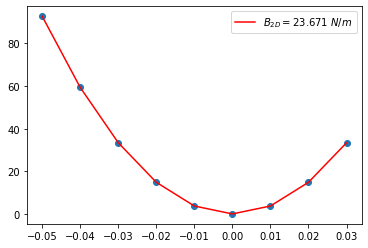

In [45]:
popt, pcov = curve_fit(func, strains, energies) 
perr = np.sqrt(np.diag(pcov))

# get minimal strain
l_opt = (-popt[2] + np.sqrt(popt[2]**2 - 3*popt[1]*popt[3]))/(3*popt[3])

# curvature at minimum (second derivative) in N Å^2/m
B = 2*np.sqrt(popt[2]**2 - 3*popt[1]*popt[3])  

plt.scatter(strains, energies)
plt.plot(strains, func(strains, *popt), '-r', label=r'$B_{2D} = %2.3f\ N/m$' % (B/(4*A0)))
plt.legend()
plt.show()

## Shear Modulus

In [46]:
atoms = bulk('Y', 'hcp', a=30.0827, b=30.0)
atoms.positions[0][2] = 15.0 # vacuum in z-dir
atoms.calc = BAFF

cell_array0 = atoms.cell.array.copy()
cell_array = cell_array0.copy()

A0 = np.cross(cell_array0[0], cell_array0[1])[2] # area of optimized cell

atoms.get_potential_energy()

4.662011348640541e-27

In [47]:
strain = 0.01 # strain increments
energies = []

for fac in np.arange(-5,4):
    cell_array[0,0] = (1.0 + fac*strain) * cell_array0[0,0]
    cell_array[1,0] = (1.0 + fac*strain) * cell_array0[1,0]
    cell_array[0,1] = (1.0 - fac*strain) * cell_array0[0,1]
    cell_array[1,1] = (1.0 - fac*strain) * cell_array0[1,1]

    atoms.set_cell(cell_array, scale_atoms=True)
    
    dyn = BFGS(atoms)
    dyn.run(fmax=1e-3)
    energies.append(atoms.get_potential_energy())
    
strains = strain*np.arange(-5,4)
energies = np.array(energies)

      Step     Time          Energy         fmax
BFGS:    0 23:27:44       46.711846      209.2987
BFGS:    1 23:27:44       15.390552      103.3423
BFGS:    2 23:27:44        5.577837        3.2627
BFGS:    3 23:27:44        5.568240        0.0469
BFGS:    4 23:27:44        5.568238        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:44        4.904888       38.8433
BFGS:    1 23:27:44        8.034315       69.5840
BFGS:    2 23:27:44        3.529539        0.3814
BFGS:    3 23:27:44        3.529406        0.0038
BFGS:    4 23:27:44        3.529406        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:44        3.409395       39.3988
BFGS:    1 23:27:44        6.240682       67.1574
BFGS:    2 23:27:44        1.969730        0.3870
BFGS:    3 23:27:44        1.969590        0.0039
BFGS:    4 23:27:44        1.969590        0.0000
      Step     Time          Energy         fmax
BFGS:    0 23:27:44        2.375070       39.9290
BFGS

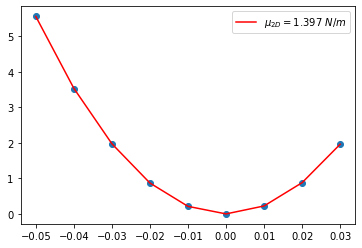

In [48]:
popt, pcov = curve_fit(func, strains, energies) 
perr = np.sqrt(np.diag(pcov))

# get minimal strain
l_opt = (-popt[2] + np.sqrt(popt[2]**2 - 3*popt[1]*popt[3]))/(3*popt[3])

# curvature at minimum (second derivative) in N Å^2/m
mu = 2*np.sqrt(popt[2]**2 - 3*popt[1]*popt[3])  

plt.scatter(strains, energies)
plt.plot(strains, func(strains, *popt), '-r', label=r'$\mu_{2D} = %2.3f\ N/m$' % (mu/(4*A0)))
plt.legend()
plt.show()